In [1]:
from transpile_benchy.metrics.gate_counts import (
    DepthMetric,
    TotalMetric,
    TotalSwaps,
)
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from mirror_gates.utilities import SubsMetric
from mirror_gates.logging import transpile_benchy_logger

In [2]:
# N = 4
# coupling_map = CouplingMap.from_line(N)
coupling_map = CouplingMap.from_grid(6, 6)

In [3]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../../circuits/medium_circuits.txt")
# library = CircuitLibrary.from_txt("../../circuits/debug.txt")

In [4]:
# XXX set consolidate to False
# this is allowed only because my pass manager will preserve consolidation
# see post_stage, I call fastconsolidate manually

# NOTE: use TotalSwaps to verify baselines have > 0 swaps
# otherwise, there is no room for improvement.
# we can include these if we want to show our methods will still work
# but somewhat trivial since we just append VF2Layout
metrics = [
    DepthMetric(consolidate=False),
    TotalMetric(consolidate=False),
    TotalSwaps(consolidate=False),
    SubsMetric(),
]

transpilers = [
    QiskitLevel3(coupling_map, syc_basis=True),
    Mirage(
        coupling_map,
        logger=transpile_benchy_logger,
        syc_basis=True,
    ),
]

In [5]:
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    logger=transpile_benchy_logger,
    num_runs=5,
)

benchmark.run()
# print(benchmark)

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | syc
  0.00% =    0/1    	 | 2.00	 | syc.syc
 97.92% =   47/48   	 | 3.00	 | syc.syc.syc
100.00% =    1/1    	 | 4.00	 | syc.syc.syc.syc


INFO:transpile_benchy:Running benchmarks for circuits...


Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | cx
  0.00% =    0/1    	 | 2.00	 | cx.cx
100.00% =    1/1    	 | 3.00	 | cx.cx.cx


Circuits from library:   0%|          | 0/13 [00:00<?, ?it/s]INFO:transpile_benchy:Running benchmark for circuit qec9xz_n17


Loading qec9xz_n17 from QASMBench


Circuits from library:   8%|▊         | 1/13 [01:13<14:47, 73.95s/it]INFO:transpile_benchy:Running benchmark for circuit seca_n11


Loading seca_n11 from QASMBench


Circuits from library:  15%|█▌        | 2/13 [02:39<14:50, 80.92s/it]INFO:transpile_benchy:Running benchmark for circuit qram_n20


Loading qram_n20 from QASMBench


Circuits from library:  23%|██▎       | 3/13 [04:26<15:25, 92.55s/it]INFO:transpile_benchy:Running benchmark for circuit knn_n25


Loading knn_n25 from QASMBench


Circuits from library:  31%|███       | 4/13 [06:26<15:32, 103.60s/it]INFO:transpile_benchy:Running benchmark for circuit swap_test_n25


Loading swap_test_n25 from QASMBench


Circuits from library:  38%|███▊      | 5/13 [08:25<14:31, 108.97s/it]INFO:transpile_benchy:Running benchmark for circuit bigadder_n18


Loading bigadder_n18 from QASMBench


Circuits from library:  46%|████▌     | 6/13 [10:35<13:34, 116.39s/it]INFO:transpile_benchy:Running benchmark for circuit multiplier_n15


Loading multiplier_n15 from QASMBench


Circuits from library:  54%|█████▍    | 7/13 [14:14<14:58, 149.77s/it]INFO:transpile_benchy:Running benchmark for circuit qft_n18


Loading qft_n18 from QASMBench


Circuits from library:  62%|██████▏   | 8/13 [18:07<14:41, 176.39s/it]INFO:transpile_benchy:Running benchmark for circuit sat_n11


Loading sat_n11 from QASMBench


Circuits from library:  69%|██████▉   | 9/13 [21:29<12:16, 184.21s/it]INFO:transpile_benchy:Running benchmark for circuit portfolioqaoa_n16


Loading portfolioqaoa_n16 from Hardcoded


Circuits from library:  77%|███████▋  | 10/13 [30:26<14:39, 293.10s/it]

Loading qftentangled_n16 from MQTBench


INFO:transpile_benchy:Running benchmark for circuit qftentangled_n16
Circuits from library:  85%|████████▍ | 11/13 [34:07<09:01, 270.98s/it]INFO:transpile_benchy:Running benchmark for circuit qpeexact_n16


Loading qpeexact_n16 from MQTBench


Circuits from library:  92%|█████████▏| 12/13 [37:36<04:12, 252.14s/it]INFO:transpile_benchy:Running benchmark for circuit ae_n16


Loading ae_n16 from MQTBench


Circuits from library: 100%|██████████| 13/13 [41:12<00:00, 190.19s/it]


In [6]:
print(benchmark)


Transpiler: Mirage-$\texttt{SYC}$

  Metric: accepted_subs
  Circuit: ae_n16                                   Mean result: 0.928                          Trials: [0.9411764705882353, 0.9327731092436975, 0.8739495798319328, 0.8907563025210085, 1.0]
  Circuit: bigadder_n18                             Mean result: 0.260                          Trials: [0.19469026548672566, 0.23893805309734514, 0.23008849557522124, 0.3008849557522124, 0.336283185840708]
  Circuit: knn_n25                                  Mean result: 0.408                          Trials: [0.5633802816901409, 0.0, 0.5492957746478874, 0.323943661971831, 0.6056338028169014]
  Circuit: multiplier_n15                           Mean result: 0.424                          Trials: [0.4263959390862944, 0.41624365482233505, 0.39593908629441626, 0.41624365482233505, 0.467005076142132]
  Circuit: portfolioqaoa_n16                        Mean result: 1.000                          Trials: [1.0, 1.0, 1.0, 1.0, 1.0]
  Circuit: qec9xz

In [7]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -23.575963088756104,
  'aggregrate_change': -25.602289738421437,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'knn_n25'},
 'monodromy_total': {'average_change': -3.5029296764236237,
  'aggregrate_change': -6.787465461464919,
  'best_circuit': 'qpeexact_n16',
  'worst_circuit': 'knn_n25'},
 'total_swaps': {'average_change': -56.399764547544336,
  'aggregrate_change': -75.4613253874236,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'knn_n25'},
 'accepted_subs': {'average_change': inf,
  'aggregrate_change': inf,
  'best_circuit': 'qec9xz_n17',
  'worst_circuit': 'qec9xz_n17'},
 'total_runtime': {'average_change': 8957.263769767147,
  'aggregrate_change': 7592.485088828795,
  'best_circuit': 'qft_n18',
  'worst_circuit': 'qec9xz_n17'}}

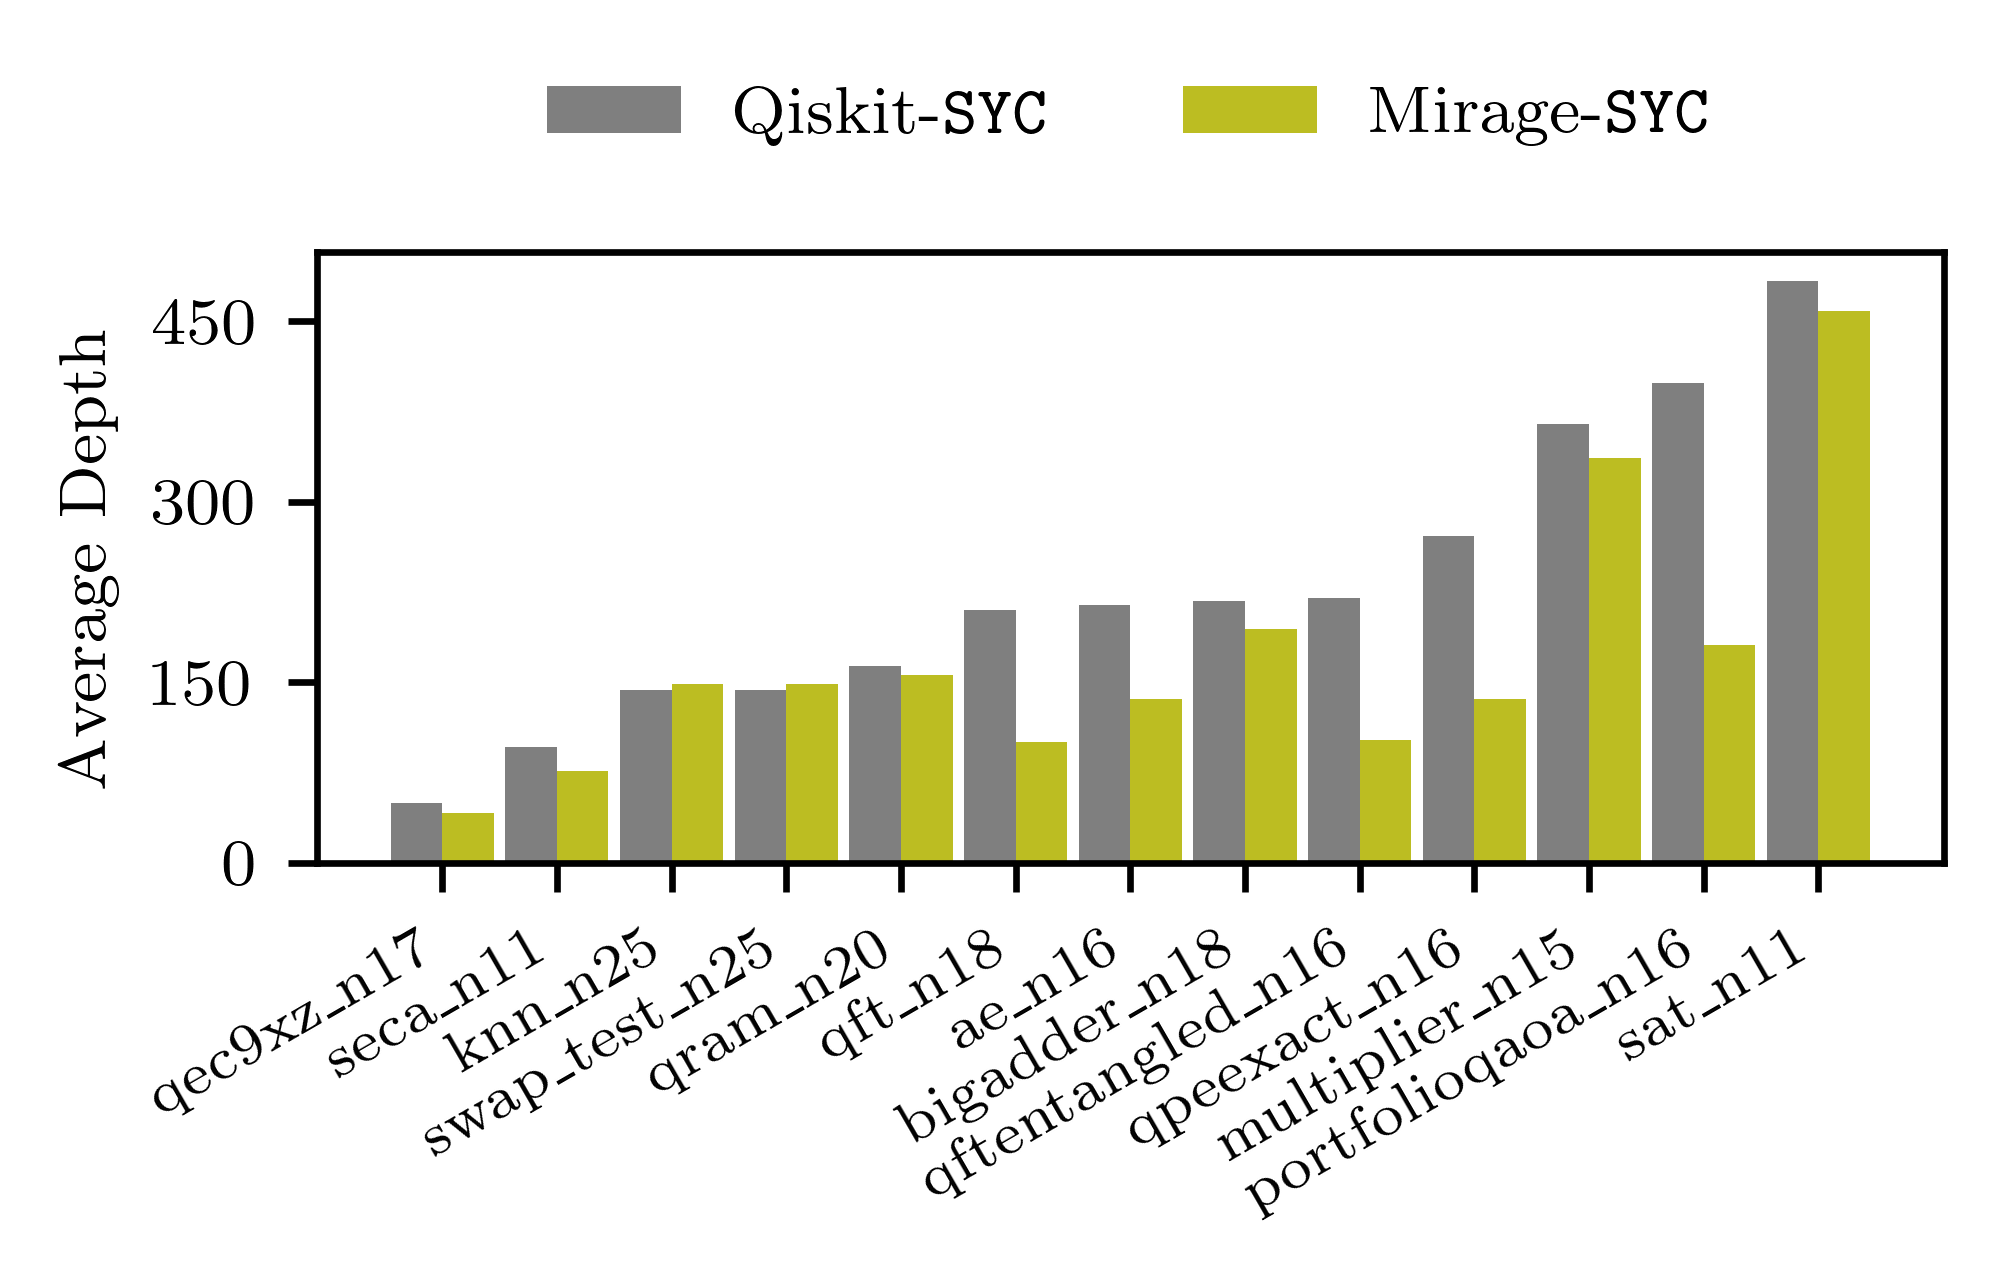

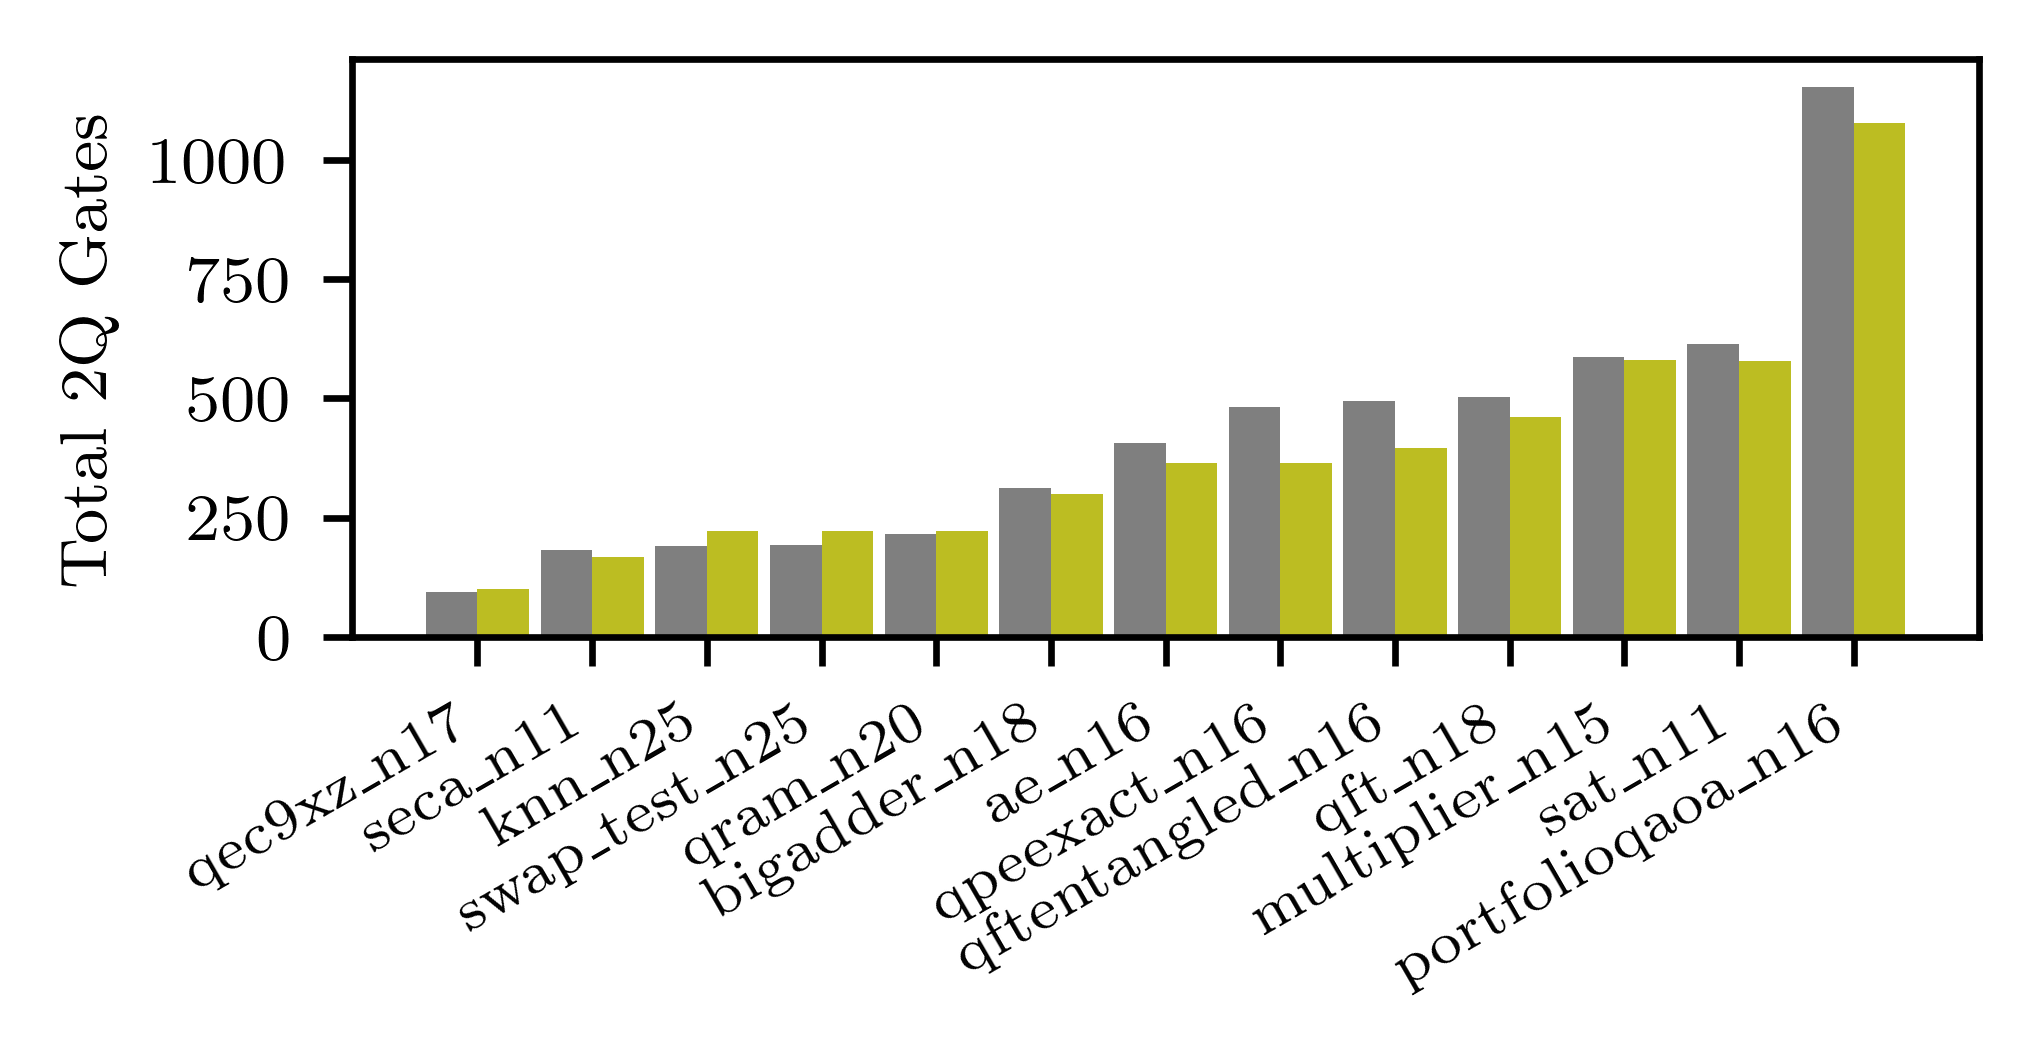

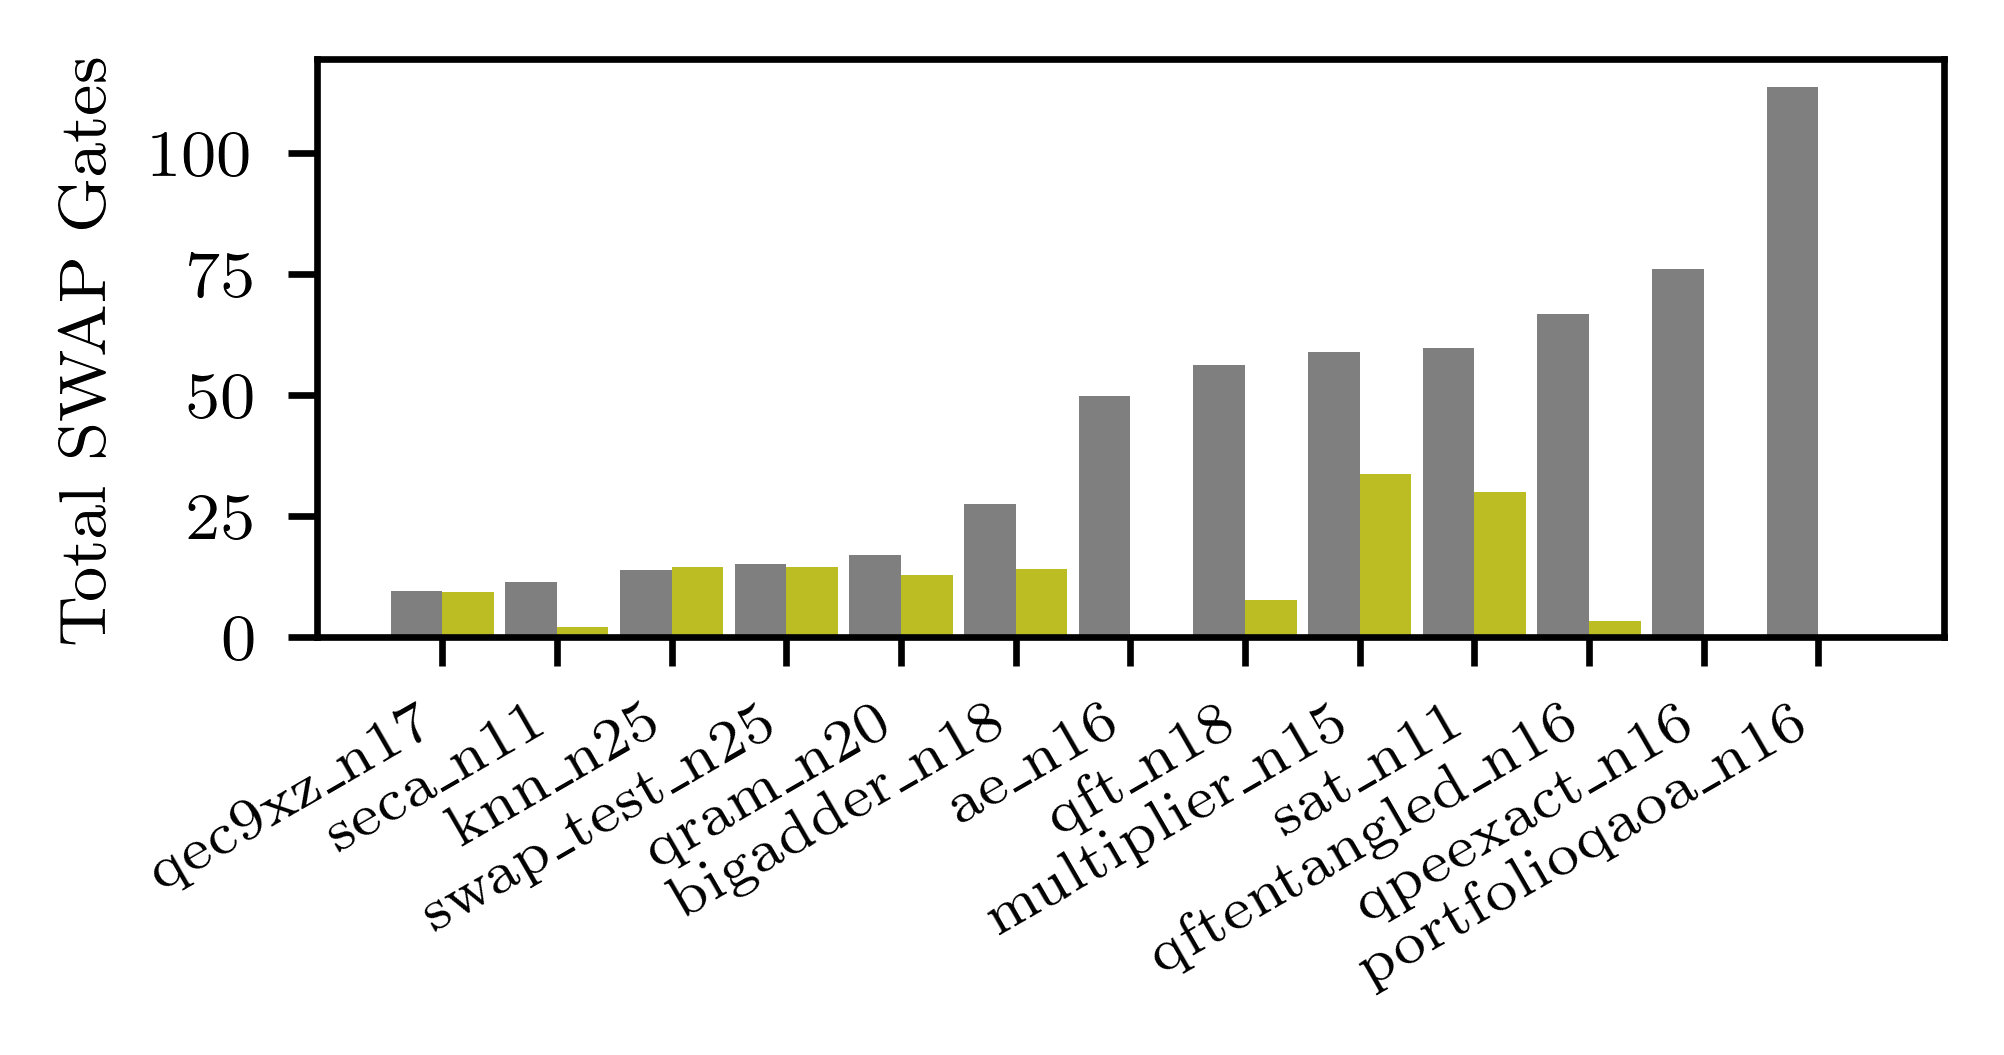

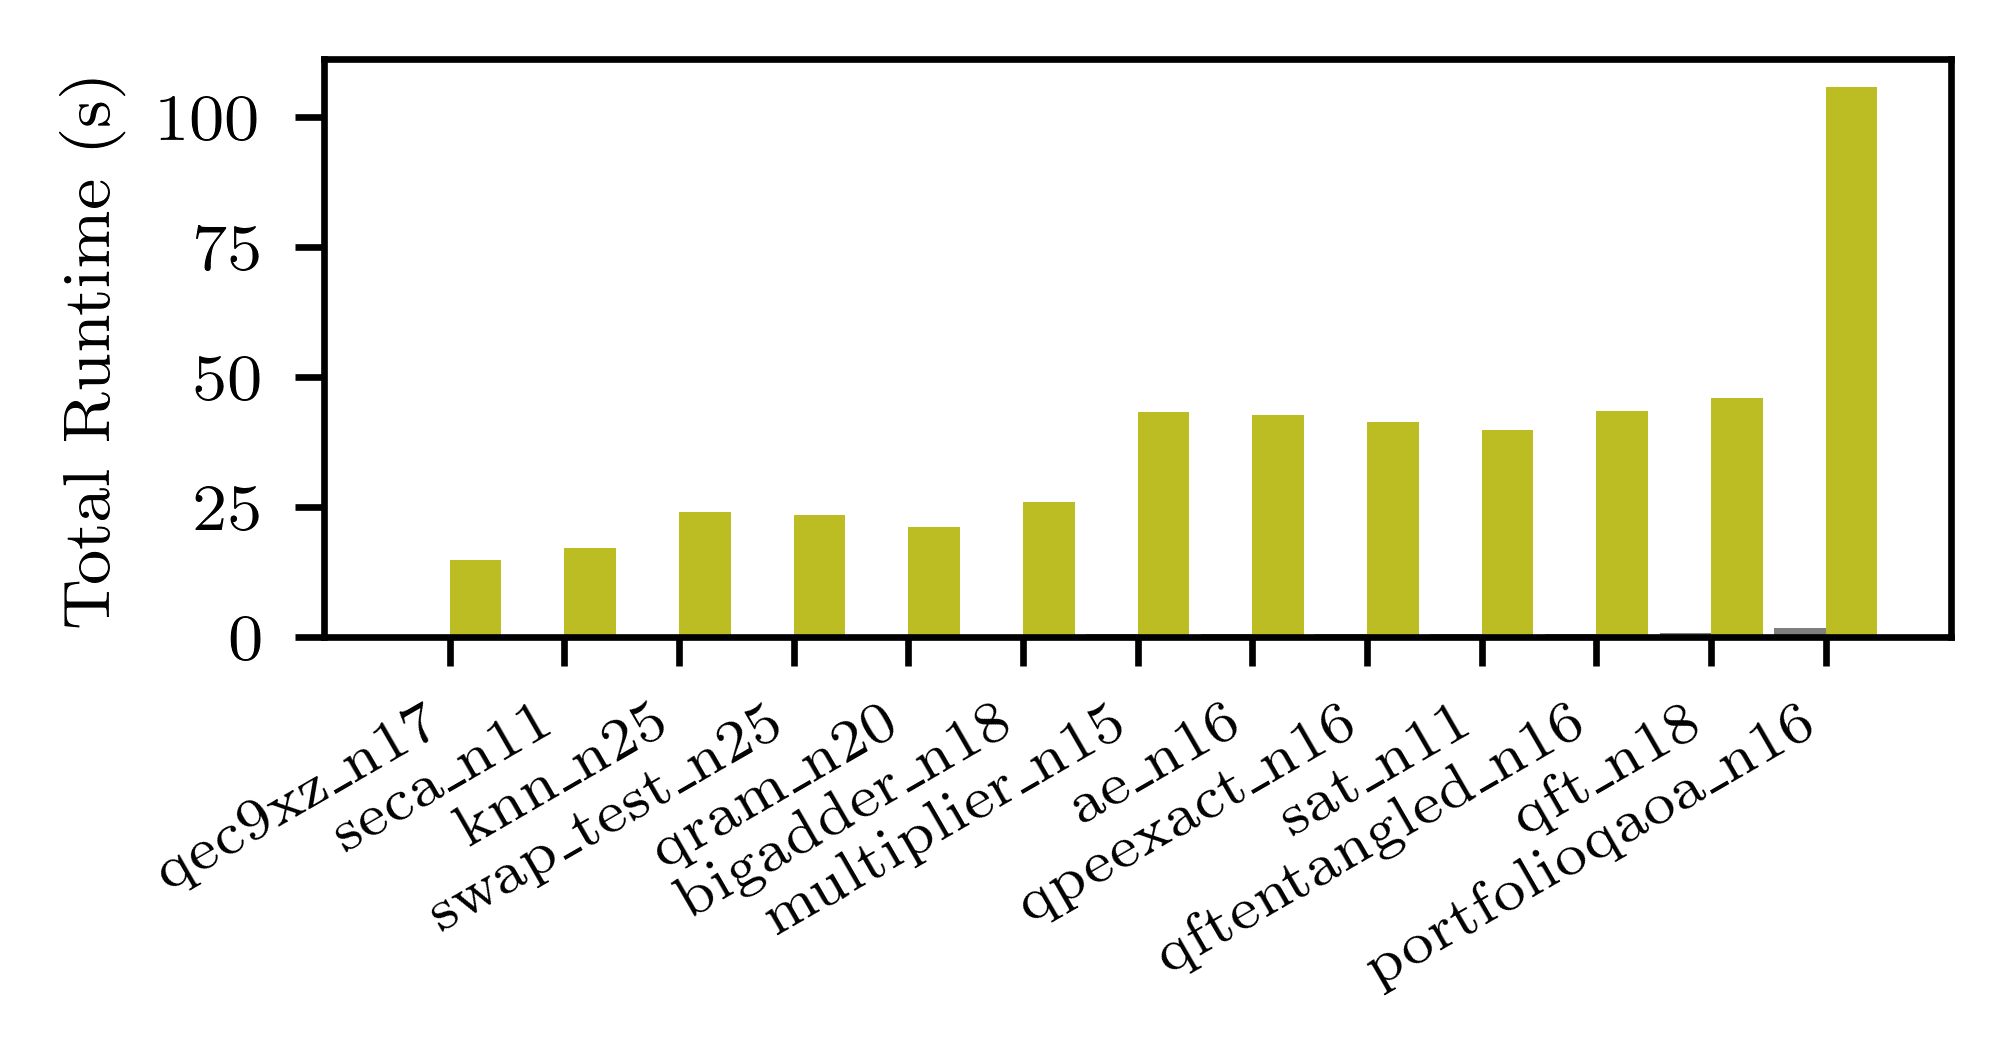

In [8]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(
    benchmark,
    save=1,
    legend_show=1,
    filename="syc_sl",
    color_override=[7, 8],
)